# Анализ связи ЛПВП с триглицеридами и влиянием пола  
Биомаркерный анализ, корреляция и линейная регрессия

### Корреляция

Шаг 1. Рассчитайте матрицу корреляции методом Пирсона (`df.corr(method="pearson")`).

In [ ]:
corr_pearson = df.corr(numeric_only=True, method="pearson") # добавить код
corr_pearson.round(2)

,Бронхиальная астма,Возраст алког,Работа,Переломы,Время пробуждения,ЛПВП,Выход на пенсию,Холестерин,Артериальная гипертония,Триглицериды,...,Время засыпания,Хроническое заболевание легких,Сигарет в день,Образование,"Индекс массы тела, кг/м^2",Прекращение работы по болезни,Религия,Профессия,ССЗ,Продолжительность сна
Бронхиальная астма,1.00,-0.01,-0.06,0.03,-0.02,-0.01,0.06,0.07,0.08,0.04,...,0.03,0.23,-0.09,-0.11,0.07,0.00,0.01,-0.04,0.08,-0.04
Возраст алког,-0.01,1.00,-0.09,-0.04,-0.09,0.04,0.08,0.08,0.04,0.08,...,0.03,0.00,-0.21,-0.04,0.06,0.03,0.04,0.04,0.04,-0.11
Работа,-0.06,-0.09,1.00,-0.06,-0.16,0.07,-0.74,-0.19,-0.19,-0.13,...,-0.04,0.00,0.08,0.14,-0.19,-0.24,-0.03,0.08,-0.22,-0.11
Переломы,0.03,-0.04,-0.06,1.00,-0.01,-0.15,0.07,0.11,0.08,0.08,...,0.01,0.07,0.07,-0.08,0.12,0.01,-0.02,-0.08,0.12,-0.02
Время пробуждения,-0.02,-0.09,-0.16,-0.01,1.00,0.04,0.10,-0.01,0.02,-0.02,...,0.30,-0.10,-0.05,0.05,-0.03,0.04,0.06,-0.02,0.00,0.67
ЛПВП,-0.01,0.04,0.07,-0.15,0.04,1.00,-0.09,-0.45,-0.55,-0.78,...,-0.03,-0.03,-0.28,0.17,-0.57,-0.06,0.01,0.13,-0.58,0.06
Выход на пенсию,0.06,0.08,-0.74,0.07,0.10,-0.09,1.00,0.22,0.23,0.14,...,0.01,-0.00,-0.13,-0.12,0.22,-0.07,0.05,-0.06,0.25,0.08
Холестерин,0.07,0.08,-0.19,0.11,-0.01,-0.45,0.22,1.00,0.73,0.44,...,-0.07,0.07,-0.05,-0.05,0.62,0.07,0.06,-0.05,0.79,0.04
Артериальная гипертония,0.08,0.04,-0.19,0.08,0.02,-0.55,0.23,0.73,1.00,0.56,...,-0.00,0.05,-0.08,-0.06,0.70,0.06,0.08,-0.05,0.88,0.02
Триглицериды,0.04,0.08,-0.13,0.08,-0.02,-0.78,0.14,0.44,0.56,1.00,...,0.01,0.03,-0.05,-0.07,0.43,0.04,0.07,-0.03,0.56,-0.03


**Выводы (дописать):**  
**Положительные корреляции:**   
"Артериальная гипертония" - "ССЗ": 0.88   
"Холестерин" - "ССЗ": 0.79   
"Индекс массы тела" - "ССЗ": 0.75   
"Артериальная гипертония" - "Холестерин": 0.73   
"Абдоминальное ожирение" - "ССЗ": 0.73   
"Время пробуждения" - "Продолжительность сна": 0.67  

**Отрицательные корреляции:**  
"ЛПВП" - "Триглицериды": -0.78   
"Возраст курения" - "Сигарет в день": -0.76   
"Пол" - "Сигарет в день": -0.52   
"Время засыпания" - "Продолжительность сна": -0.50   


Шаг 2. Визуализируйте корреляции с помощью графика `seaborn.heatmap`

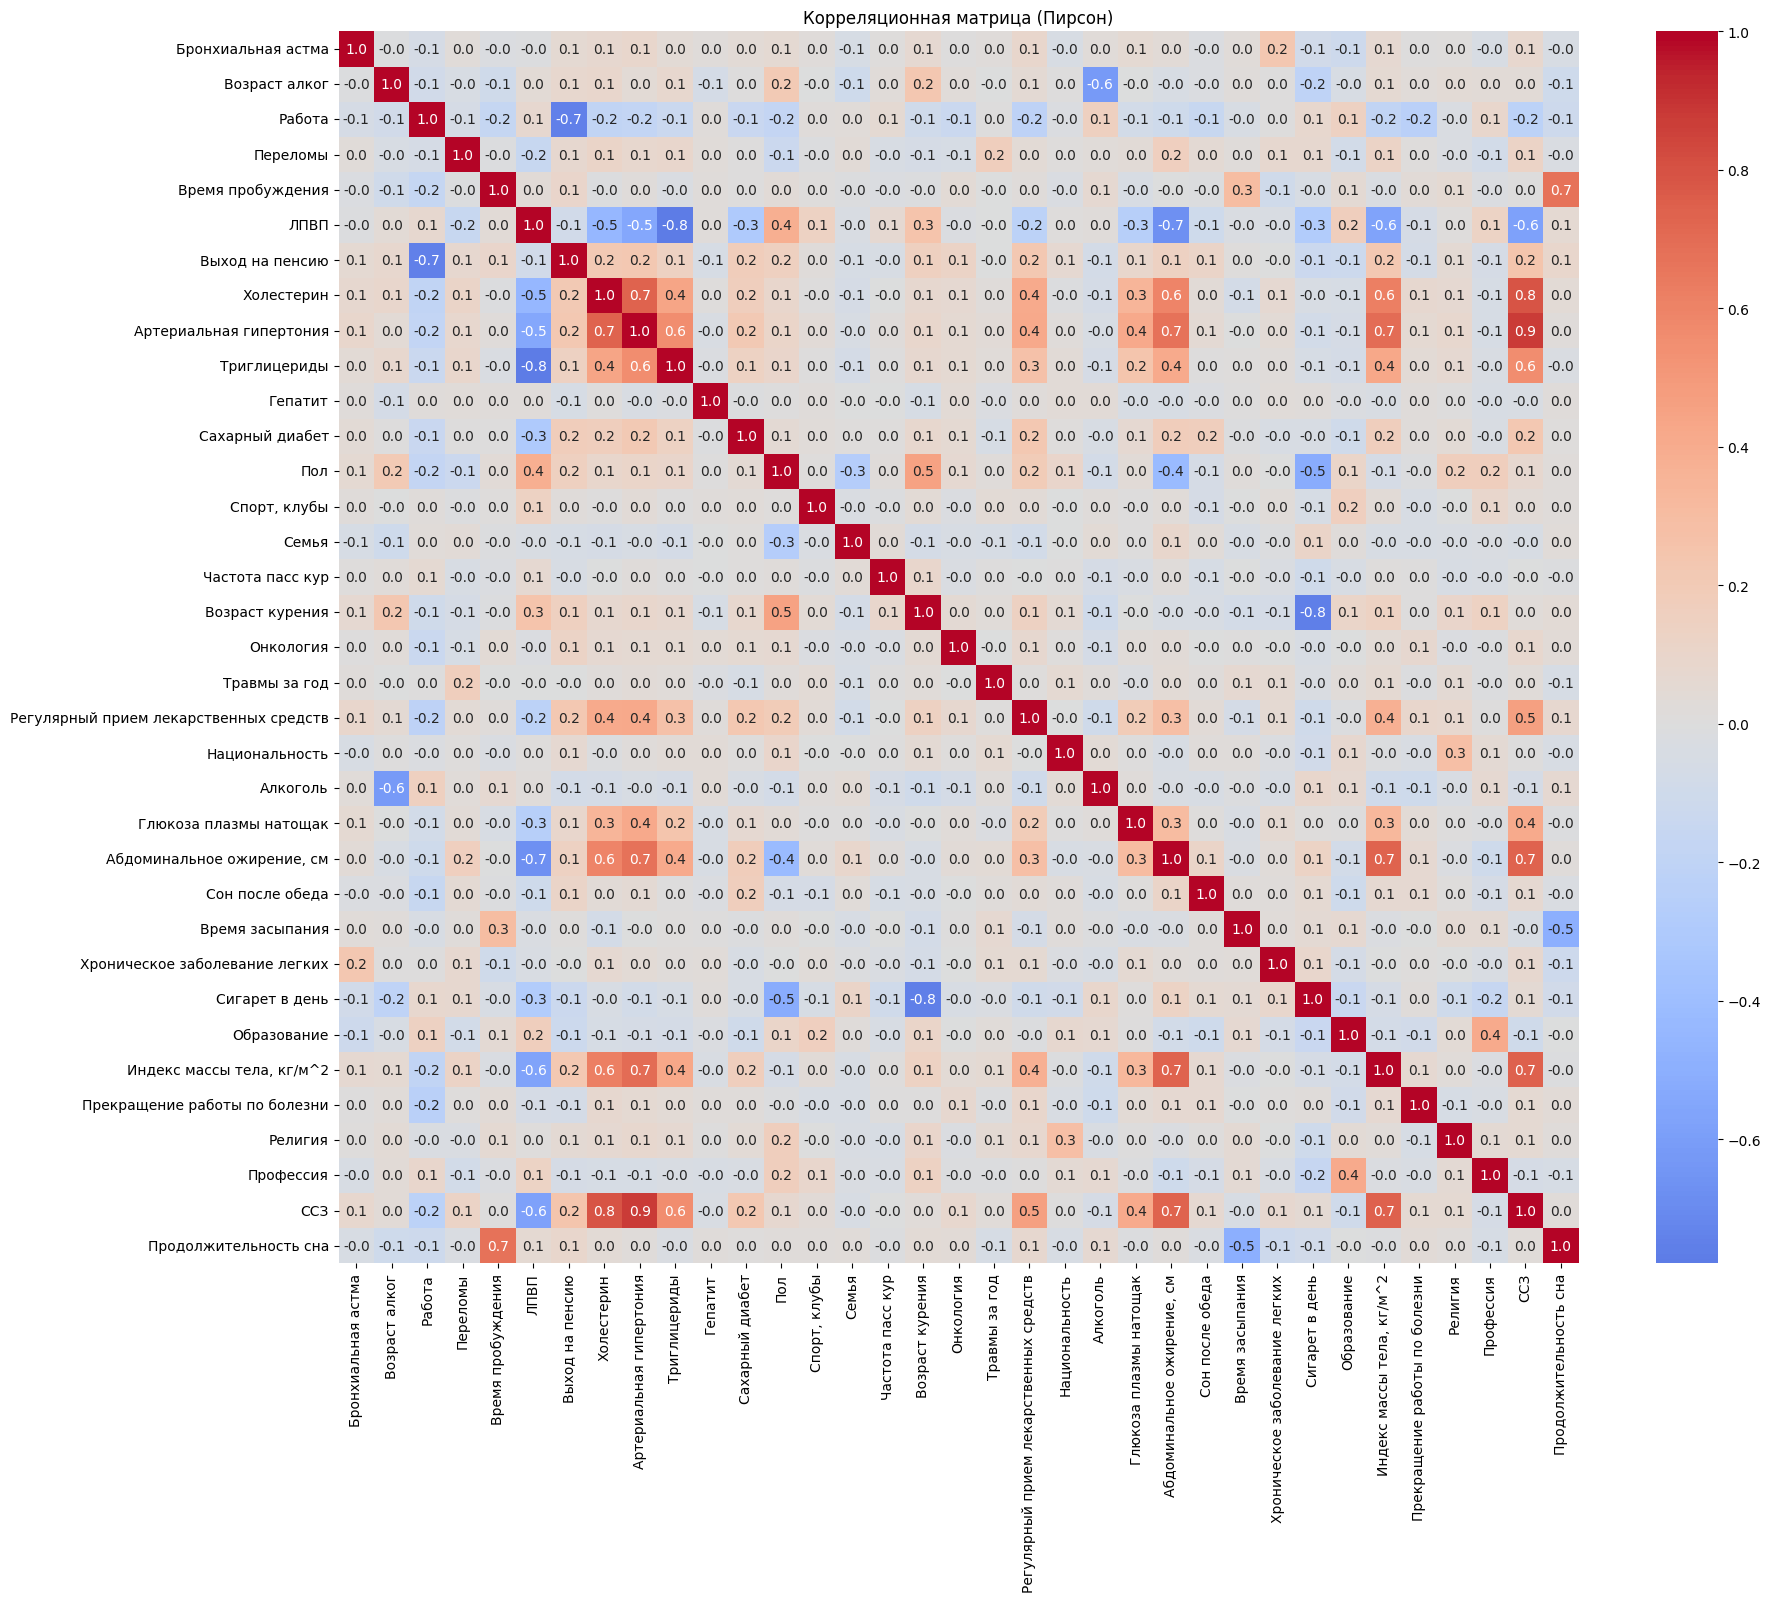

In [ ]:
plt.figure(figsize=(20,16))
sns.heatmap(data = corr_pearson, cmap='coolwarm', center=0, annot=True, fmt=".1f") # добавьте после "data =" название матрицы корреляции из предыдущего кода
plt.title("Корреляционная матрица (Пирсон)")
plt.show()

Шаг 3. Проанализируйте связи с целевой переменное (ЛПВП), постройте график barplot с помощью `seaborn.barplot`. С помощью параметра `ascending=False` в функции `sort_values` переделайте график, чтобы расположить столбцы в порядке убывания.

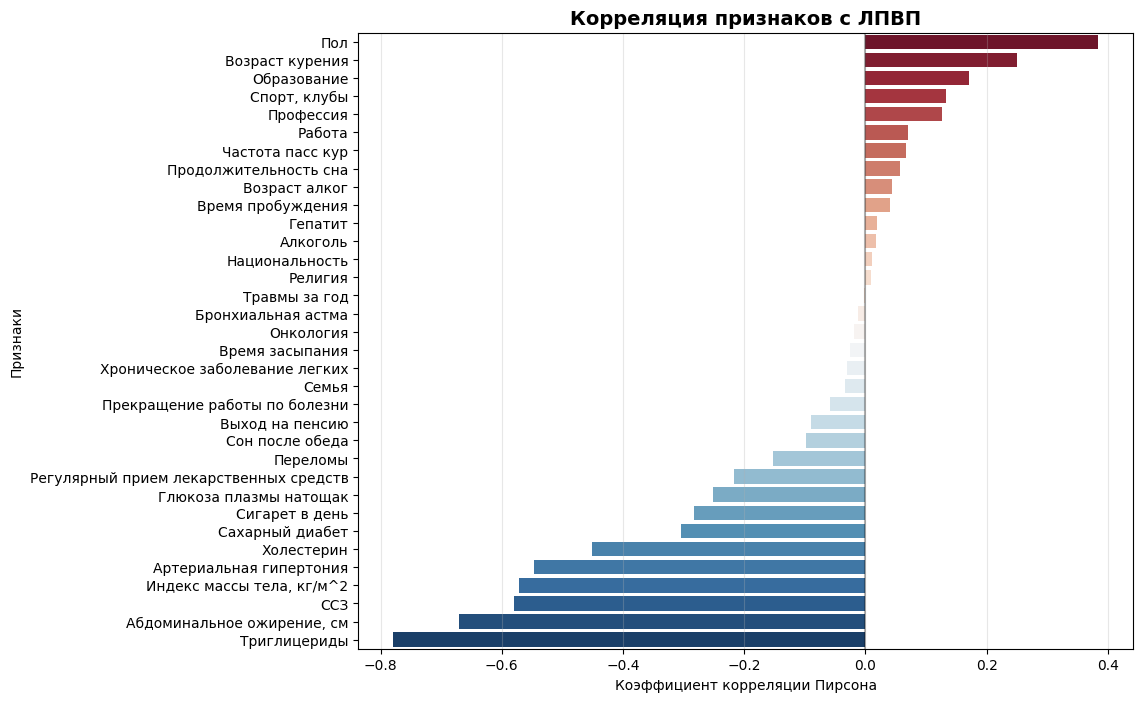

In [ ]:
target_corr = corr_pearson["ЛПВП"].drop("ЛПВП").sort_values(ascending=False) # допиши код
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.values, y=target_corr.index, palette='RdBu')
plt.title("Корреляция признаков с ЛПВП", fontsize=14, fontweight='bold')
plt.xlabel("Коэффициент корреляции Пирсона")
plt.ylabel("Признаки")
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)
plt.grid(axis='x', alpha=0.3)
plt.show()

**Выводы (дописать):**

Сильные положительные связи:

-  **"Пол"**— наиболее высокая положительная корреляция с целевой переменной.

- **"Возраст курения"**

Сильные отрицательные связи:

-  **"Триглицериды"**— самая сильная отрицательная корреляция.

- **"Абдоминальное ожирение"** — также выраженная отрицательная зависимость: чем больше окружность живота, тем ниже значение целевой переменной.

Шаг 4. Постройте scatter-график с линией тренда (`seaborn.regplot`) для признака с самой сильной корреляцией с признаком "ЛПВП", сделайте вывод о характере связи.
По оси y возьмите признак "ЛПВП", а по оси x признак с самой высокой корреляцией с "ЛПВП" (подсказка: корреляция отрицательная).

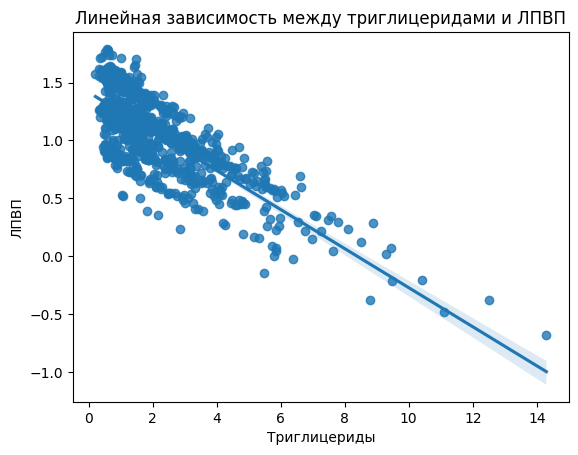

In [ ]:
sns.regplot(
    data = df,
    x = "Триглицериды",
    y = "ЛПВП",
) # добавьте название датасета, x, y
plt.title("Линейная зависимость между триглицеридами и ЛПВП")
plt.show()

**Выводы (дописать):**

На графике видна ярко выраженная **отрицательная** зависимость между уровнем триглицеридов и ЛПВП. Уровень триглицеридов обратно пропорционален уровню ЛПВП.
Чем выше триглицериды, тем ниже ЛПВП.

Видим отрицательные значения ЛПВП. Необходимо их удалить для чистоты статистического анализа

In [ ]:
column_name = 'ЛПВП'
negative_rows = df[df[column_name] < 0]
negative_indices = negative_rows.index.tolist()
print(negative_indices)

[40, 277, 382, 471, 534, 561, 745, 786]


In [ ]:
column_name = 'ЛПВП'
negative_indices = df[df[column_name] < 0].index.tolist()

df.drop(negative_indices, inplace=True)

print(f"Удалено строк: {len(negative_indices)}")
print(f"Осталось строк: {len(df)}")

Удалено строк: 8
Осталось строк: 941


In [ ]:
# СОРТИРОВКА ПО ВОЗРАСТАНИЮ ЛПВП (самые минимальные значения вверху)
sorted_ascending = df.sort_values('ЛПВП')
display(sorted_ascending[['ЛПВП', 'Триглицериды', 'Пол']].head(10))

,ЛПВП,Триглицериды,Пол
91,0.00,5.78,0
909,0.02,9.28,1
558,0.05,5.84,0
785,0.05,7.63,1
440,0.07,5.85,0
333,0.07,9.43,1
503,0.09,5.72,0
72,0.12,8.52,1
532,0.15,6.99,0
706,0.16,5.32,0


In [ ]:
# удаление строки с нулевым значением
df = df.drop(91)

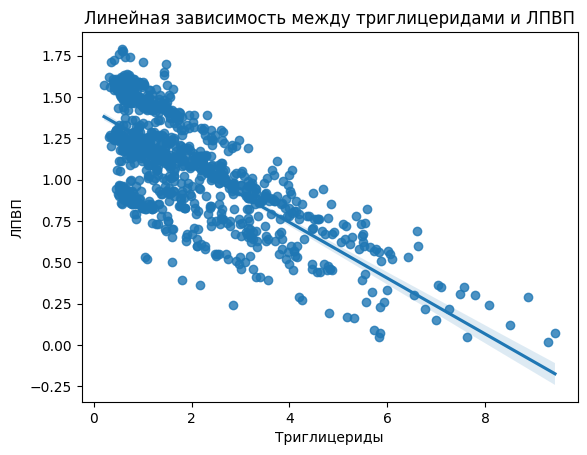

In [ ]:
sns.regplot(
    data = df,
    x = "Триглицериды",
    y = "ЛПВП",
) # добавьте название датасета, x, y
plt.title("Линейная зависимость между триглицеридами и ЛПВП")
plt.show()

### Линейная регрессия

Шаг 1. Создайте список features

In [ ]:
features = ['Триглицериды'] # добавьте 'Триглицериды'

target = "ЛПВП" # целевая переменная

Шаг 2. Разделите данные на train/test с помошью `train_test_split`.

In [ ]:
X = df[features].copy()
y = df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42 # random_state=42 для того, чтобы при повторном запуске модели получить тот же результат
)

Шаг 3. Нормализацизуйте признаки используя `StandardScaler`: обучите scaler на train, примените к train и test, сохраните преобразованные данные.


In [ ]:
scaler = StandardScaler()        # создаём объект стандартизации (вычитает среднее, делит на std)
X_train_scaled = scaler.fit_transform(X_train)   # обучаем scaler на train и сразу масштабируем train

X_test_scaled = scaler.transform(X_test)         # масштабируем test теми же параметрами (mean/std)

X_train_s = pd.DataFrame(X_train_scaled, columns=features, index=X_train.index)
# превращаем масштабированный train в DataFrame с теми же колонками и индексами

X_test_s = pd.DataFrame(X_test_scaled,  columns=features, index=X_test.index)
# то же самое для test

Шаг 4. Обучите модель `LinearRegression()` и получите прогноз на тестовых данных.

In [ ]:
lin = LinearRegression()
lin.fit(X_train_s, y_train)

LinearRegression()

Шаг 5. Выведите уравнение модели, получая коэффициенты `model.coef_` и свободный член `model.intercept_`.

In [ ]:
# Свободный член и коэффициенты
b0 = lin.intercept_
coefs = pd.Series(lin.coef_, index=features)

print("Свободный член (b0):", round(b0, 3))
print()

print("Коэффициенты модели:")
display(coefs.to_frame("Коэффициент").round(3))

# Формирование уравнения модели
terms = [f"{coefs[f]:.3f}·{f}" for f in features]
equation = f"{target} = {b0:.3f} + " + " + ".join(terms)

print("\nУравнение модели:\n")
print(equation)

Свободный член (b0): 1.086

Коэффициенты модели:


,Коэффициент
Триглицериды,-0.255



Уравнение модели:

ЛПВП = 1.086 + -0.255·Триглицериды


Шаг 6. Посчитайте метрики оценки качества (R², MAE, RMSE). Сделайте вывод о качестве модели.

In [ ]:
# Предсказания
y_pred = lin.predict(X_test_s)

# Метрики
r2   = r2_score(y_test, y_pred)
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"R²   = {r2:.3f}")
print(f"MAE  = {mae:.3f}")
print(f"MSE  = {mse:.3f}")
print(f"RMSE = {rmse:.3f}")
print(f"MAPE = {mape:.3f}")

R²   = 0.581
MAE  = 0.186
MSE  = 0.051
RMSE = 0.226
MAPE = 0.252


**Выводы:**
- R² (коэффициент детерминации) Показывает, какую долю вариации целевой переменной объясняет модель. 0.581 → модель объясняет 58.1% изменений ЛПВП.
- MAE 0.182 → в среднем модель ошибается на 0.18 единицы ЛПВП.
- MSE средний квадрат ошибки. Чувствителен к большим отклонениям.
0.051 → небольшие крупные ошибки, модель стабильная.
- RMSE — ошибка в тех же единицах, что и целевая переменная.
0.226 → средняя ошибка примерно 0.22 ЛПВП.
- MAPE - ***средняя относительная ошибка модели составляет 25,2%***

**(*)Мной были удалены строки с отрицательными и нулевыми значениями исследуемых признаков**

Строим две разные модели регрессии для мужчин и женщин, то есть отдельно для `df_0 = df[df['Пол'] == 0]` и `df_1 = df[df['Пол'] == 1]`.

Для `df_0 = df[df['Пол'] == 0]`:

In [ ]:
# мы присвоили бинарное значение 0 - мужчинам

features_0 = ['Триглицериды']

target_0 = "ЛПВП"

df_0 = df[df['Пол'] == 0]

x_0 = df_0[features_0].copy()
y_0 = df_0[target_0].copy()

# продолжите код
x_train_0, x_test_0, y_train_0, y_test_0 = train_test_split(
    x_0, y_0, test_size=0.20, random_state=42
)
scaler_0 = StandardScaler()        # создаём объект стандартизации (вычитает среднее, делит на std)
x_train_scaled_0 = scaler_0.fit_transform(x_train_0)   # обучаем scaler на train и сразу масштабируем train

x_test_scaled_0 = scaler_0.transform(x_test_0)         # масштабируем test теми же параметрами (mean/std)

x_train_s_0 = pd.DataFrame(x_train_scaled_0, columns=features_0, index=x_train_0.index)
# превращаем масштабированный train в DataFrame с теми же колонками и индексами

x_test_s_0 = pd.DataFrame(x_test_scaled_0,  columns=features_0, index=x_test_0.index)
# то же самое для test

lin_0 = LinearRegression()
lin_0.fit(x_train_s_0, y_train_0)


# Свободный член и коэффициенты
b0_0 = lin_0.intercept_
coefs_0 = pd.Series(lin_0.coef_, index=features_0)

# Формирование уравнения модели
terms_0 = [f"{coefs_0[f]:.3f}·{f}" for f in features_0]
equation_0 = f"{target_0} = {b0_0:.3f} + " + " + ".join(terms_0)

# Предсказания
y_pred_0 = lin_0.predict(x_test_s_0)

# Метрики
r2_0   = r2_score(y_test_0, y_pred_0)
mae_0  = mean_absolute_error(y_test_0, y_pred_0)
mse_0  = mean_squared_error(y_test_0, y_pred_0)
rmse_0 = np.sqrt(mean_squared_error(y_test_0, y_pred_0))
mape_0 = mean_absolute_percentage_error(y_test_0, y_pred_0)

results_table_0 = pd.DataFrame({
    'Параметр': ['Свободный член (b)', 'Коэффициент (k)', 'R²', 'MAE', 'MSE', 'RMSE', 'MAPE'],
    'Значение': [
        round(b0_0, 3),
        round(coefs_0.iloc[0], 3),
        round(r2_0, 3),
        round(mae_0, 3),
        round(mse_0, 3),
        round(rmse_0, 3),
        round(mape_0, 3)
    ]
})

print("ТАБЛИЦА РЕЗУЛЬТАТОВ ДЛЯ 'МУЖСКОЙ' МОДЕЛИ")
display(results_table_0)
print()
print("\nУравнение для 'мужской' модели:\n")
print(equation_0)

ТАБЛИЦА РЕЗУЛЬТАТОВ ДЛЯ 'МУЖСКОЙ' МОДЕЛИ


,Параметр,Значение
0,Свободный член (b),0.871
1,Коэффициент (k),-0.232
2,R²,0.715
3,MAE,0.135
4,MSE,0.022
5,RMSE,0.150
6,MAPE,0.185




Уравнение для 'мужской' модели:

ЛПВП = 0.871 + -0.232·Триглицериды


Для `df_1 = df[df['Пол'] == 1]`:

In [ ]:
# мы присвоили бинарное значение 1 - женщинам

features_1 = ['Триглицериды']

target_1 = "ЛПВП"

df_1 = df[df['Пол'] == 1]

x_1 = df_1[features_1].copy()
y_1 = df_1[target_1].copy()

# продолжите код
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(
    x_1, y_1, test_size=0.20, random_state=42
)
scaler_1 = StandardScaler()        # создаём объект стандартизации (вычитает среднее, делит на std)
x_train_scaled_1 = scaler_1.fit_transform(x_train_1)   # обучаем scaler на train и сразу масштабируем train

x_test_scaled_1 = scaler_1.transform(x_test_1)         # масштабируем test теми же параметрами (mean/std)

x_train_s_1 = pd.DataFrame(x_train_scaled_1, columns=features_1, index=x_train_1.index)
# превращаем масштабированный train в DataFrame с теми же колонками и индексами

x_test_s_1 = pd.DataFrame(x_test_scaled_1,  columns=features_1, index=x_test_1.index)
# то же самое для test

lin_1 = LinearRegression()
lin_1.fit(x_train_s_1, y_train_1)


# Свободный член и коэффициенты
b0_1 = lin_1.intercept_
coefs_1 = pd.Series(lin_1.coef_, index=features_1)

# Формирование уравнения модели
terms_1 = [f"{coefs_1[f]:.3f}·{f}" for f in features_1]
equation_1 = f"{target_1} = {b0_1:.3f} + " + " + ".join(terms_1)

# Предсказания
y_pred_1 = lin_1.predict(x_test_s_1)

# Метрики
r2_1   = r2_score(y_test_1, y_pred_1)
mae_1  = mean_absolute_error(y_test_1, y_pred_1)
mse_1  = mean_squared_error(y_test_1, y_pred_1)
rmse_1 = np.sqrt(mean_squared_error(y_test_1, y_pred_1))
mape_1 = mean_absolute_percentage_error(y_test_1, y_pred_1)

results_table_1 = pd.DataFrame({
    'Параметр': ['Свободный член (b)', 'Коэффициент (k)', 'R²', 'MAE', 'MSE', 'RMSE', 'MAPE'],
    'Значение': [
        round(b0_1, 3),
        round(coefs_1.iloc[0], 3),
        round(r2_1, 3),
        round(mae_1, 3),
        round(mse_1, 3),
        round(rmse_1, 3),
        round(mape_1, 3)
    ]
})

print("\nТАБЛИЦА РЕЗУЛЬТАТОВ ДЛЯ 'ЖЕНСКОЙ' МОДЕЛИ\n")
display(results_table_1)
print()
print("\nУравнение для 'женской' модели:\n")
print(equation_1)


ТАБЛИЦА РЕЗУЛЬТАТОВ ДЛЯ 'ЖЕНСКОЙ' МОДЕЛИ



,Параметр,Значение
0,Свободный член (b),1.175
1,Коэффициент (k),-0.284
2,R²,0.802
3,MAE,0.132
4,MSE,0.025
5,RMSE,0.158
6,MAPE,0.221




Уравнение для 'женской' модели:

ЛПВП = 1.175 + -0.284·Триглицериды


In [ ]:
# Общая таблица сравнения трех моделей
comparison_table = pd.DataFrame({
    'Параметр': ['Свободный член (b)', 'Коэффициент (k)', 'R²', 'MAE', 'MSE', 'RMSE', 'MAPE', 'Количество пациентов'],
    'Общая модель': [
        round(b0, 3),
        round(coefs.iloc[0], 3),
        round(r2, 3),
        round(mae, 3),
        round(mse, 3),
        round(rmse, 3),
        round(mape, 3),
        len(df)
    ],
    'Мужская модель (0)': [
        round(b0_0, 3),
        round(coefs_0.iloc[0], 3),
        round(r2_0, 3),
        round(mae_0, 3),
        round(mse_0, 3),
        round(rmse_0, 3),
        round(mape_0, 3),
        len(df_0)
    ],
    'Женская модель (1)': [
        round(b0_1, 3),
        round(coefs_1.iloc[0], 3),
        round(r2_1, 3),
        round(mae_1, 3),
        round(mse_1, 3),
        round(rmse_1, 3),
        round(mape_1, 3),
        len(df_1)
    ]
})

print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА ВСЕХ ТРЕХ МОДЕЛЕЙ")
print("="*80)
display(comparison_table)

# Вывод уравнений
print("\nУРАВНЕНИЯ МОДЕЛЕЙ:")
print("="*50)
print(f"Общая модель      : {equation}")
print(f"Мужская модель (0): {equation_0}")
print(f"Женская модель (1): {equation_1}")

СРАВНИТЕЛЬНАЯ ТАБЛИЦА ВСЕХ ТРЕХ МОДЕЛЕЙ


,Параметр,Общая модель,Мужская модель (0),Женская модель (1)
0,Свободный член (b),1.086,0.871,1.175
1,Коэффициент (k),-0.255,-0.232,-0.284
2,R²,0.581,0.715,0.802
3,MAE,0.186,0.135,0.132
4,MSE,0.051,0.022,0.025
5,RMSE,0.226,0.150,0.158
6,MAPE,0.252,0.185,0.221
7,Количество пациентов,940.000,280.000,660.000



УРАВНЕНИЯ МОДЕЛЕЙ:
Общая модель      : ЛПВП = 1.086 + -0.255·Триглицериды
Мужская модель (0): ЛПВП = 0.871 + -0.232·Триглицериды
Женская модель (1): ЛПВП = 1.175 + -0.284·Триглицериды


# **Выводы** по сравнению моделей (М, Ж и общая)


---
- все три модели находятся в допустимых значениях однако, у женщин связь показателей сильнее всего
- коэффициент детерминации у женской модели интерпретируется как "очень хороший" (80.2% вариабельности ЛПВП объясняется уровнем триглицеридов)
- средняя абсолютная ошибка показывает, что для мужской и женской модели ошибка в среднем на 0.135 и 0.132 реальных единиц, что может интерпретироваться как допустимый показатель
- метрика "Корень из средней квадратичной ошибки" показывает, что в мужской и женской модели критических выбросов нет (при условии нормального распределения ошибок, отклонения в ±0.30–0.32 реальных единиц наблюдаются в ~95% случаев)
- средняя процентная ошибка наименьшая у мужской модели — 18.5%, женская модель также демонстрирует хорошую точность (22.1%). Тогда как общая уже ранжируется как удовлетворительная.
- разделение медицинских данных по признаку "Пол" имеет смысл при машинном обучении
- "женская модель" и "мужская модель" оказались качественнее для предсказания, чем общая при этом для "мужской модели" вероятно существуют дополнительные признаки влияния